In [1]:
import gymnasium as gym
from src.basic_agent import BasicAgent
import matplotlib.pyplot as plt
import numpy as np

In [2]:

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
weak_agent = BasicAgent(print_mode=True)
action = weak_agent.start_step()
total_steps = 5000
for _ in range(total_steps):
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        reward = weak_agent.terminal_step(observation, reward)
        observation, info = env.reset()
        action = weak_agent.start_step()
    else:
        action, reward = weak_agent.step(observation, reward)
env.close()

hs_1l: vy=-0.33684566617012024, l1=1.0, l2=0.0
Crash: vy=-0.36653581261634827, l1=0.0, l2=0.0
Safe: vy=0.020666591823101044, l1=1.0, l2=1.0
x=-0.9276575446128845
hs_1l: vy=-0.28950756788253784, l1=0.0, l2=1.0
Crash: vy=-0.8013182878494263, l1=1.0, l2=1.0
Safe: vy=5.037864170276407e-08, l1=1.0, l2=1.0
x=-0.07565803825855255
Landed in goal as well
ls_1l: vy=-0.03303517401218414, l1=1.0, l2=0.0
Safe: vy=-0.003005801932886243, l1=1.0, l2=1.0
x=-0.18426303565502167
Landed in goal as well
Crash: vy=0.09156809747219086, l1=0.0, l2=0.0
ls_1l: vy=0.009063907898962498, l1=1.0, l2=0.0
Crash: vy=0.11108512431383133, l1=0.0, l2=0.0
hs_bl: vy=-0.40810883045196533, l1=1.0, l2=1.0
hs_1l: vy=-0.3203974664211273, l1=0.0, l2=1.0
hs_1l: vy=-0.256961852312088, l1=0.0, l2=1.0
ls_1l: vy=-0.026121800765395164, l1=0.0, l2=1.0
ls_1l: vy=-0.0010900591732934117, l1=1.0, l2=0.0
Safe: vy=3.9598930356987694e-08, l1=1.0, l2=1.0
x=-0.08024110645055771
Landed in goal as well
hs_1l: vy=-0.4502978026866913, l1=1.0, l2=0.

Percent Done: 5.0%
Percent Done: 10.0%
Percent Done: 15.0%
Percent Done: 20.0%
Percent Done: 25.0%
Percent Done: 30.0%
Percent Done: 35.0%
Percent Done: 40.0%
Percent Done: 45.0%
Percent Done: 50.0%
Percent Done: 55.0%
Percent Done: 60.0%
Percent Done: 65.0%
Percent Done: 70.0%
Percent Done: 75.0%
Percent Done: 80.0%
Percent Done: 85.0%
Percent Done: 90.0%
Percent Done: 95.0%
Percent Done: 100.0%


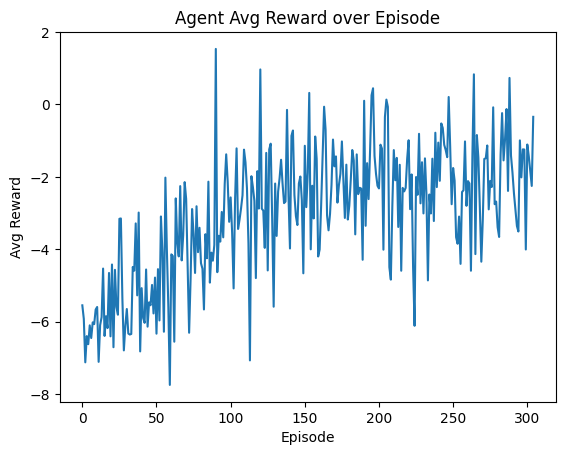

In [2]:

env = gym.make("LunarLander-v2")
observation, info = env.reset()
agent1 = BasicAgent(print_mode=False)
action = agent1.start_step()
reward_hist = []
batch_hist = []
total_reward = 0
batch_reward = 0
ep_steps = 0
batch = 50
total_steps = 1500000
print_fac = 20
print_interval = int(total_steps/print_fac)
for _ in range(total_steps):
    if (_+1) % print_interval == 0:
        percent_done = (_+1)/total_steps*100
        print(f"Percent Done: {percent_done:.1f}%")
    observation, reward, terminated, truncated, info = env.step(action)
    ep_steps += 1
    if terminated or truncated:
        reward = agent1.terminal_step(observation, reward)
        total_reward += reward
        reward_hist.append(total_reward/ep_steps)
        total_reward = 0
        ep_steps = 0
        observation, info = env.reset()
        action = agent1.start_step()
    else:
        action, reward = agent1.step(observation, reward)
        total_reward += reward
env.close()

# Group Episodes into batches to average out performance
bval = 0
b_iter = 1
for val in reward_hist:
    b_iter += 1
    if (b_iter % batch) != 0:
        bval += val
    else:
        bval = bval/batch
        batch_hist.append(bval)
        bval = 0
plt.plot(batch_hist)
plt.title("Agent Avg Reward over Episode")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.show()

In [3]:
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
agent1.toggle_print()
action = agent1.start_step()
total_steps = 5000
for _ in range(total_steps):
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        agent1.terminal_step(observation, reward)
        observation, info = env.reset()
        action = agent1.policy(observation)
    else:
        action = agent1.policy(observation)
env.close()
agent1.toggle_print()

Safe: vy=-5.382354562044611e-09, l1=1.0, l2=1.0
x=0.34014254808425903
hs_1l: vy=-0.31276941299438477, l1=1.0, l2=0.0
hs_bl: vy=-0.44059643149375916, l1=1.0, l2=1.0
Crash: vy=-1.1195875406265259, l1=0.0, l2=0.0
Safe: vy=-8.070182744290832e-09, l1=1.0, l2=1.0
x=-0.5786218643188477
Crash: vy=-0.9995009303092957, l1=1.0, l2=0.0
Safe: vy=2.6399288088896355e-08, l1=1.0, l2=1.0
x=-0.09462747722864151
Landed in goal as well
hs_1l: vy=-0.4191870093345642, l1=1.0, l2=0.0
hs_bl: vy=-0.3908548653125763, l1=1.0, l2=1.0
Crash: vy=-1.1139098405838013, l1=1.0, l2=1.0
Safe: vy=-6.247831407790727e-08, l1=1.0, l2=1.0
x=0.0936405211687088
Landed in goal as well
Safe: vy=-3.42090835658837e-08, l1=1.0, l2=1.0
x=-0.0871807113289833
Landed in goal as well
hs_1l: vy=-0.5073603987693787, l1=0.0, l2=1.0
Safe: vy=6.18669173491071e-06, l1=1.0, l2=1.0
x=-0.1523783653974533
Landed in goal as well
Crash: vy=-0.3791920840740204, l1=0.0, l2=0.0
Safe: vy=-8.176235688495126e-09, l1=1.0, l2=1.0
x=-0.1451837569475174
Lande